In [131]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_qrc_rewards(pt_file="../data/qrc_reward_seeds.pt", name="QRC"):
    data = torch.load(pt_file)
    all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

    # Ensure 2D shape
    if all_rewards.ndim == 1:
        all_rewards = all_rewards.reshape(1, -1)

    num_seeds, num_episodes = all_rewards.shape
    print("num_seeds :", num_seeds)
    print("num_episodes :", num_episodes)

    # Compute mean and std across seeds
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)

    episodes = np.arange(1, num_episodes + 1)

    # 90% confidence interval
    ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
    plt.figure(figsize=(12,6))
    sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
    plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                    alpha=0.3, color="blue", label="90% CI")
    plt.title(f"{name} Training Rewards seeds 0-{num_seeds}, 90% CI")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid(True)
    plt.legend()
    plt.show()

    # 95% confidence interval
    ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
    plt.figure(figsize=(14,6))
    sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
    plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                    alpha=0.3, color="red", label="95% CI")
    plt.title(f"{name} Training Rewards seeds 0-{num_seeds}, 95% CI")
    plt.xlabel("Episode")
    plt.ylabel("Return per Episode")
    plt.grid(True)
    plt.legend()
    plt.show()

def load_reward_file(pt_file):
    data = torch.load(pt_file)
    rewards = np.array(data['rewards'])

    if rewards.ndim == 1:
        rewards = rewards.reshape(1, -1)

    num_seeds, num_episodes = rewards.shape
    mean_rewards = rewards.mean(axis=0)
    std_rewards = rewards.std(axis=0)
    ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))  # 95% CI

    return mean_rewards, ci_95, num_episodes, num_seeds


def plot_graph(qrc_file=None, dqn_file=None, qrc_name="QRC", dqn_name="DQN", graph_title="Training Reward Comparison"):
    plt.figure(figsize=(14, 7))

    # ---- Plot QRC ----
    if qrc_file is not None:
        qrc_mean, qrc_ci, qrc_len, qrc_seeds = load_reward_file(qrc_file)
        episodes = np.arange(1, qrc_len + 1)
        print("QRC seeds :", qrc_seeds)
        

        sns.lineplot(x=episodes, y=qrc_mean, label=qrc_name, color="red")
        # plt.fill_between(episodes, qrc_mean - qrc_ci, qrc_mean + qrc_ci, color="red",
        #                  alpha=0.25, label=f"{qrc_name} 95% CI")

    # ---- Plot DQN ----
    if dqn_file is not None:
        dqn_mean, dqn_ci, dqn_len, dqn_seeds = load_reward_file(dqn_file)
        episodes = np.arange(1, dqn_len + 1)
        print("DQN seeds :", dqn_seeds)

        sns.lineplot(x=episodes, y=dqn_mean, label=dqn_name, color="blue")
        # plt.fill_between(episodes, dqn_mean - dqn_ci, dqn_mean + dqn_ci, color="blue",
        #                  alpha=0.25, label=f"{dqn_name} 95% CI")

    plt.title(graph_title)
    plt.xlabel("Episode")
    plt.ylabel("Return per Episode")
    plt.grid(True)
    plt.legend()
    plt.show()


def load_all_rewards(folder="results_qrc"):
    """Load all txt reward files from folder and return a 2D NumPy array (seeds x episodes)"""
    all_files = sorted([f for f in os.listdir(folder) if f.endswith(".txt")])
    rewards_list = []

    for index, file in enumerate(all_files):
        
        file_path = os.path.join(folder, file)
        rewards = np.loadtxt(file_path)
        # Ensure 1D array
        rewards = rewards.reshape(-1)
        rewards_list.append(rewards)

    all_rewards = np.stack(rewards_list, axis=0)  # shape: (num_seeds, num_episodes)
    return all_rewards

def plot_rewards_from_folder(folder="results_qrc", name="QRC"):
    all_rewards = load_all_rewards(folder)
    num_seeds, num_episodes = all_rewards.shape
    print(f"Loaded rewards: {num_seeds} seeds, {num_episodes} episodes each.")

    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)

    episodes = np.arange(1, num_episodes + 1)

    # 90% CI
    ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
    plt.figure(figsize=(12,6))
    sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
    plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                     alpha=0.3, color="blue", label="90% CI")
    plt.title(f"{name} Training Rewards (90% CI)")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid(True)
    plt.legend()
    plt.show()

    # 95% CI
    ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
    plt.figure(figsize=(12,6))
    sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
    plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                     alpha=0.3, color="red", label="95% CI")
    plt.title(f"{name} Training Rewards (95% CI) : Seed {num_seeds}")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_multiple_rewards(folders, names, ci=0.95, title="Training Rewards Comparison"):
    assert len(folders) == len(names), "folders and names must have same length"

    plt.figure(figsize=(14,7))
    plt.rcParams.update({
        "font.size": 20,
        "axes.titlesize": 20,
        "axes.labelsize": 20,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14
    })

    for folder, name in zip(folders, names):
        all_rewards = load_all_rewards(folder)
        num_seeds, num_episodes = all_rewards.shape

        mean_rewards = np.mean(all_rewards, axis=0)
        std_rewards = np.std(all_rewards, axis=0)
        episodes = np.arange(1, num_episodes + 1)

        if ci == 0.90:
            ci_multiplier = 1.645
        elif ci == 0.95:
            ci_multiplier = 1.96
        else:
            raise ValueError("CI must be 0.90 or 0.95")

        ci_values = ci_multiplier * (std_rewards / np.sqrt(num_seeds))

        sns.lineplot(x=episodes, y=mean_rewards, label=name)
        plt.fill_between(episodes, mean_rewards - ci_values, mean_rewards + ci_values,
                         alpha=0.3)

        print(f"[{name}] Seeds: {num_seeds}, Episodes: {num_episodes}")

    plt.title(f"{title} ({int(ci*100)}% CI)")
    plt.xlabel("Episode")
    plt.ylabel("Return per Episode")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_multiple_rewards_smooth(folders, names, ci=0.95, title="Training Rewards Comparison", smooth_window=10):
    """
    Plot mean rewards with CI for multiple folders on the same graph with optional smoothing.
    
    folders       : list of folder paths
    names         : list of names corresponding to folders
    ci            : confidence interval (0.9 or 0.95)
    smooth_window : window size for moving average smoothing
    """
    assert len(folders) == len(names), "folders and names must have same length"

    plt.figure(figsize=(14,7))

    for folder, name in zip(folders, names):
        all_rewards = load_all_rewards(folder)
        num_seeds, num_episodes = all_rewards.shape

        mean_rewards = np.mean(all_rewards, axis=0)
        std_rewards = np.std(all_rewards, axis=0)

        # Apply simple moving average for smoothing
        if smooth_window > 1:
            mean_rewards = np.convolve(mean_rewards, np.ones(smooth_window)/smooth_window, mode='same')

        episodes = np.arange(1, num_episodes + 1)

        if ci == 0.90:
            ci_multiplier = 1.645
        elif ci == 0.95:
            ci_multiplier = 1.96
        else:
            raise ValueError("CI must be 0.90 or 0.95")

        ci_values = ci_multiplier * (std_rewards / np.sqrt(num_seeds))

        sns.lineplot(x=episodes, y=mean_rewards, label=name)
        # plt.fill_between(episodes, mean_rewards - ci_values, mean_rewards + ci_values,
        #                  alpha=0.3)

        print(f"[{name}] Seeds: {num_seeds}, Episodes: {num_episodes}")

    plt.title(f"{title} ({int(ci*100)}% CI)")
    plt.xlabel("Episode")
    plt.ylabel("Return per Episode")
    plt.grid(True)
    plt.legend()
    plt.show()
    



QRC seeds : 124
DQN seeds : 251


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_20446/848980590.py:53: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])
/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_20446/848980590.py:53: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])


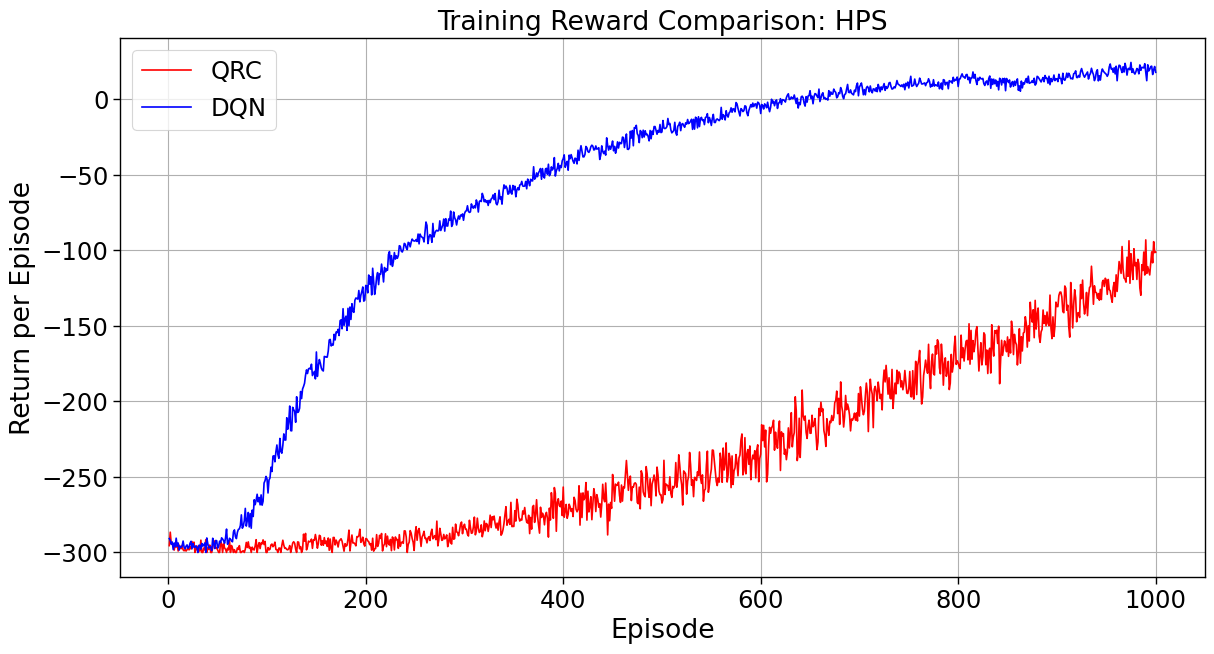

QRC seeds : 183
DQN seeds : 119


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_20446/848980590.py:53: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])
/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_20446/848980590.py:53: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])


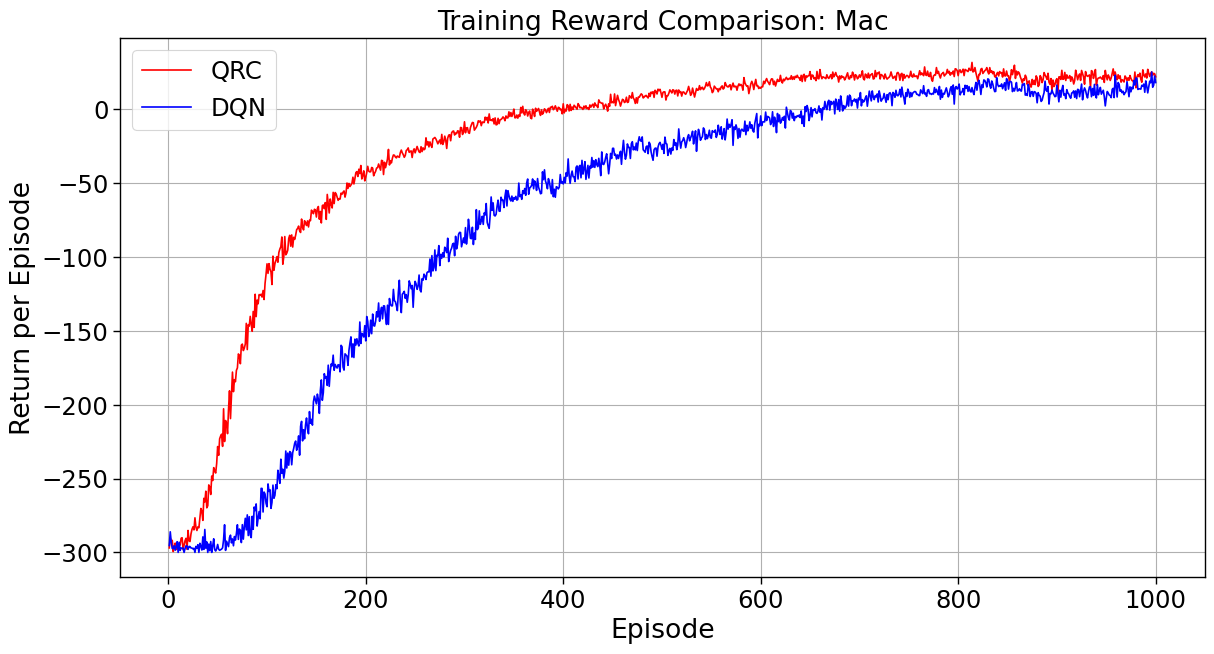

In [132]:
# plot_qrc_rewards(pt_file="../data/qrc_reward_seeds_hps.pt", name="QRC hps")
# plot_qrc_rewards(pt_file="../data/dqn_reward_seeds_target_update_2.pt", name="DQN Target Update 2")

plot_graph(
    qrc_file="../data/qrc_reward_seeds_hlr_1.pt",
    dqn_file="../data/qrc_results/qrc_best_hyperparameters.pt",
    graph_title="Training Reward Comparison: HPS"
)

plot_graph(
    qrc_file="../data/qrc_reward_seeds_ntu.pt",
    dqn_file="../data/qrc_reward_seeds_new.pt",
    graph_title="Training Reward Comparison: Mac"
)

[Baseline (MacBook)] Seeds: 250, Episodes: 1000
[Baseline (Compute Canada)] Seeds: 210, Episodes: 1000
[HP Sweep – 5 PM] Seeds: 251, Episodes: 1000
[HP Sweep – 7 PM] Seeds: 251, Episodes: 1000
[DQN's HP] Seeds: 251, Episodes: 1000


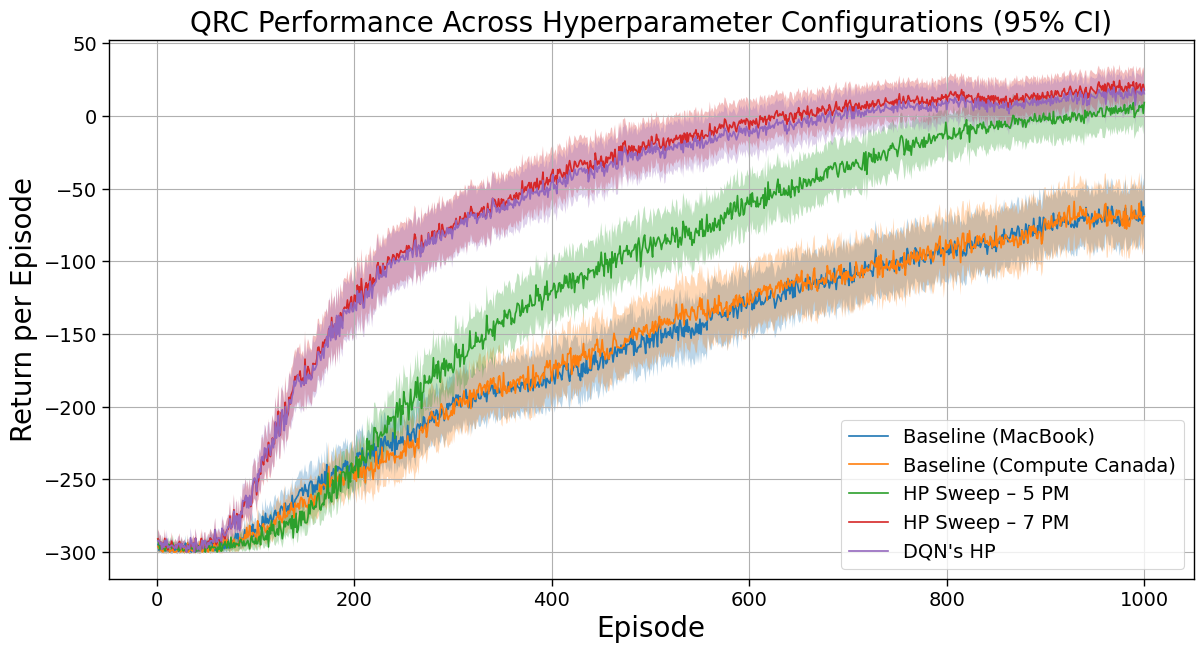

In [133]:
folders = [
    "../data/qrc_results/baseline_mac", 
    "../data/qrc_results/baseline_cc", 
    "../data/qrc_results/hps_5pm",
    "../data/qrc_results/best_hyperparameters",
    "../data/qrc_results/with_dqn_hyperparameters"
]
names = [
    "Baseline (MacBook)",
    "Baseline (Compute Canada)",
    "HP Sweep – 5 PM",
    "HP Sweep – 7 PM",
    "DQN's HP"
]
plot_multiple_rewards(folders, names, ci=0.95, title="QRC Performance Across Hyperparameter Configurations")

[QRC] Seeds: 251, Episodes: 1000
[DQN] Seeds: 251, Episodes: 1000


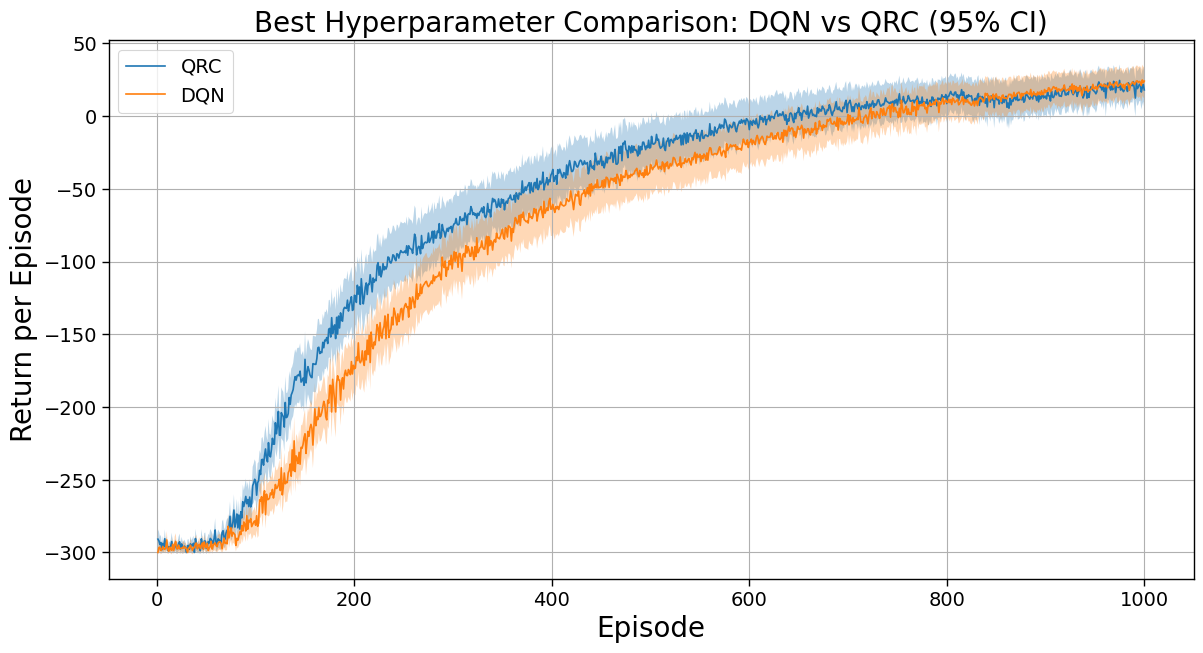

[QRC] Seeds: 251, Episodes: 1000
[DQN] Seeds: 251, Episodes: 1000


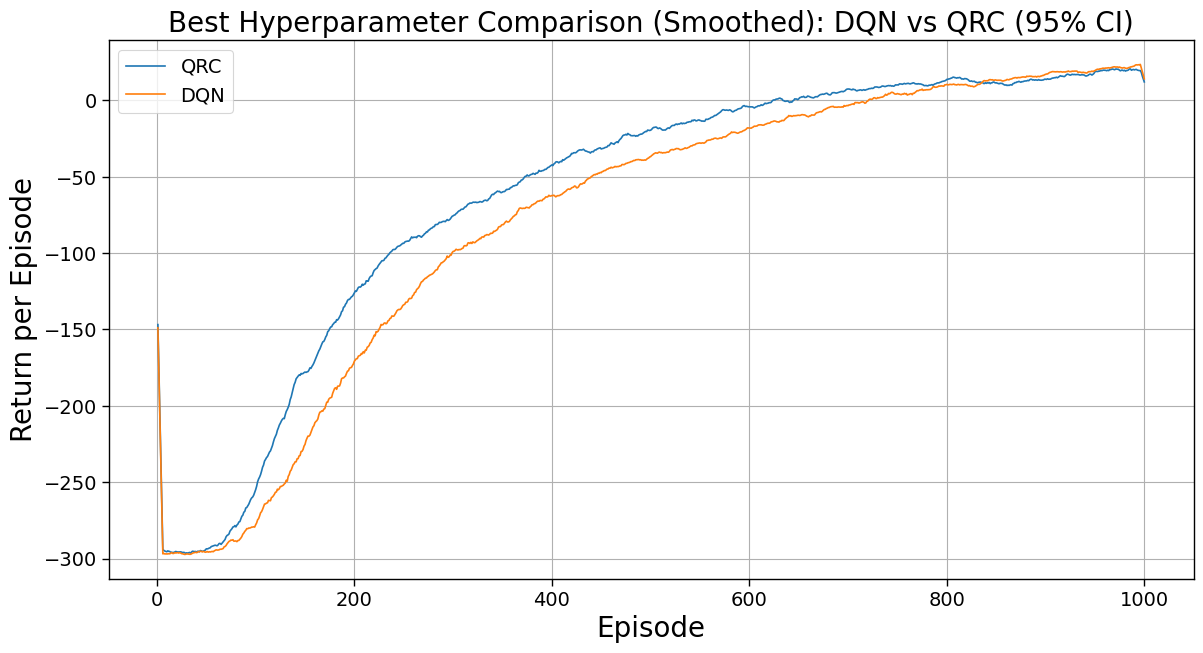

In [134]:
folders = [
    "../data/qrc_results/best_hyperparameters",
    "../data/dqn_results/best_hyperparameters"
]
names = [
    "QRC",
    "DQN",
]
plot_multiple_rewards(
    folders, 
    names, 
    ci=0.95, 
    title="Best Hyperparameter Comparison: DQN vs QRC"
)

plot_multiple_rewards_smooth(
    folders, 
    names, 
    ci=0.95, 
    title="Best Hyperparameter Comparison (Smoothed): DQN vs QRC"
)

[DQN] Seeds: 251, Episodes: 1000
[DQN sub] Seeds: 251, Episodes: 1000


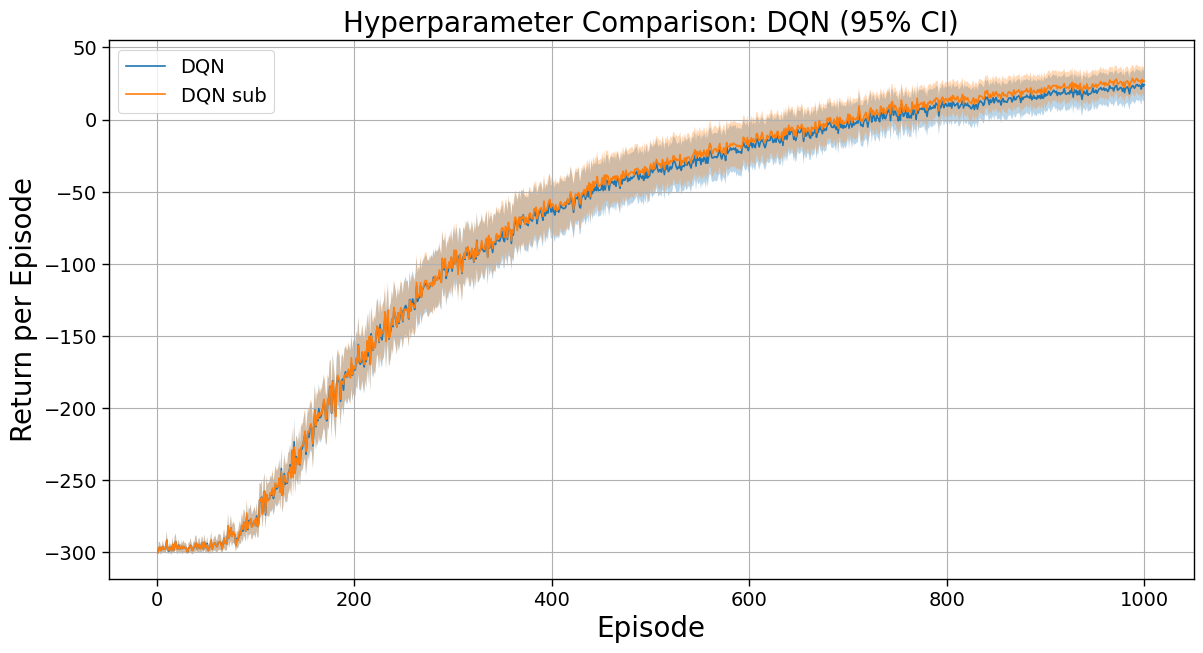

[DQN] Seeds: 251, Episodes: 1000
[DQN sub] Seeds: 251, Episodes: 1000


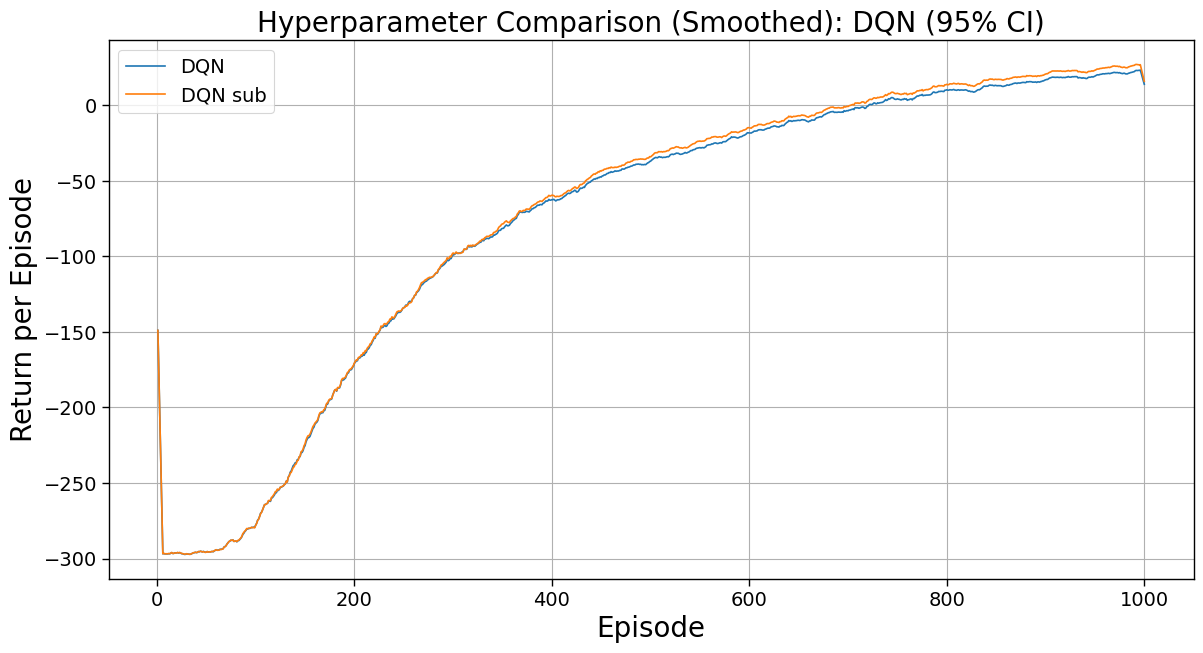

In [135]:
folders = [
    "../data/dqn_results/best_hyperparameters",
    "../data/dqn_results/with_qrc_hyperparameters",
]
names = [
    "DQN",
    "DQN sub"
]
plot_multiple_rewards(
    folders, 
    names, 
    ci=0.95, 
    title="Hyperparameter Comparison: DQN"
)

plot_multiple_rewards_smooth(
    folders, 
    names, 
    ci=0.95, 
    title="Hyperparameter Comparison (Smoothed): DQN"
)

[QRC] Seeds: 251, Episodes: 1000
[QRC sub] Seeds: 251, Episodes: 1000


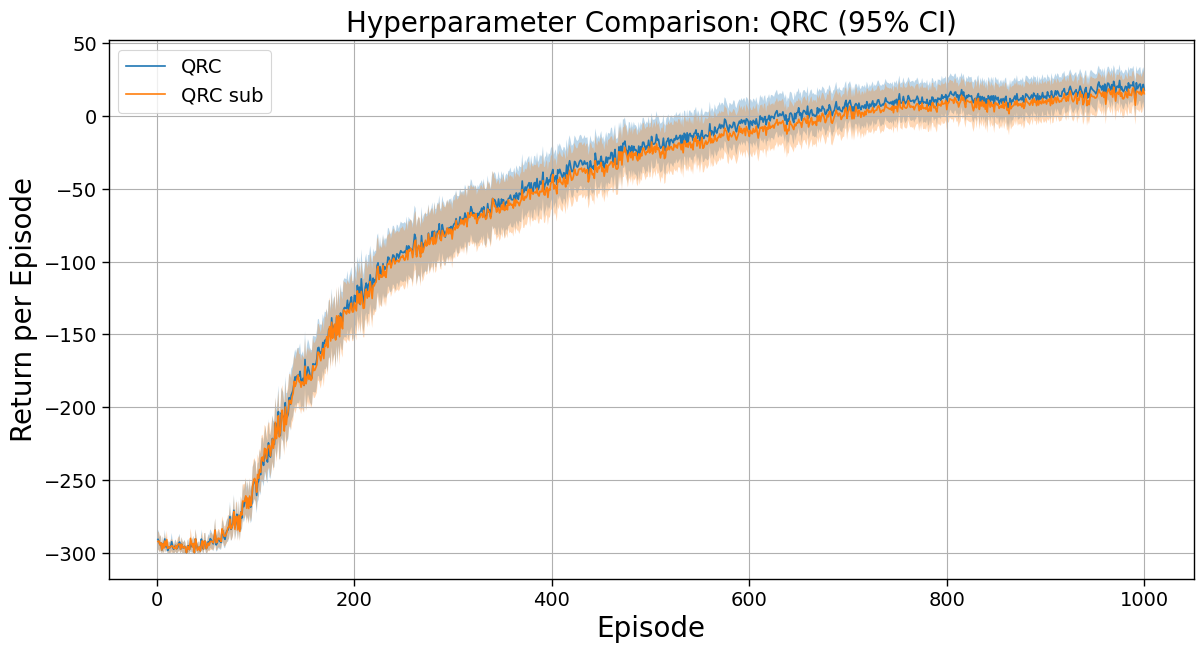

[QRC] Seeds: 251, Episodes: 1000
[QRC sub] Seeds: 251, Episodes: 1000


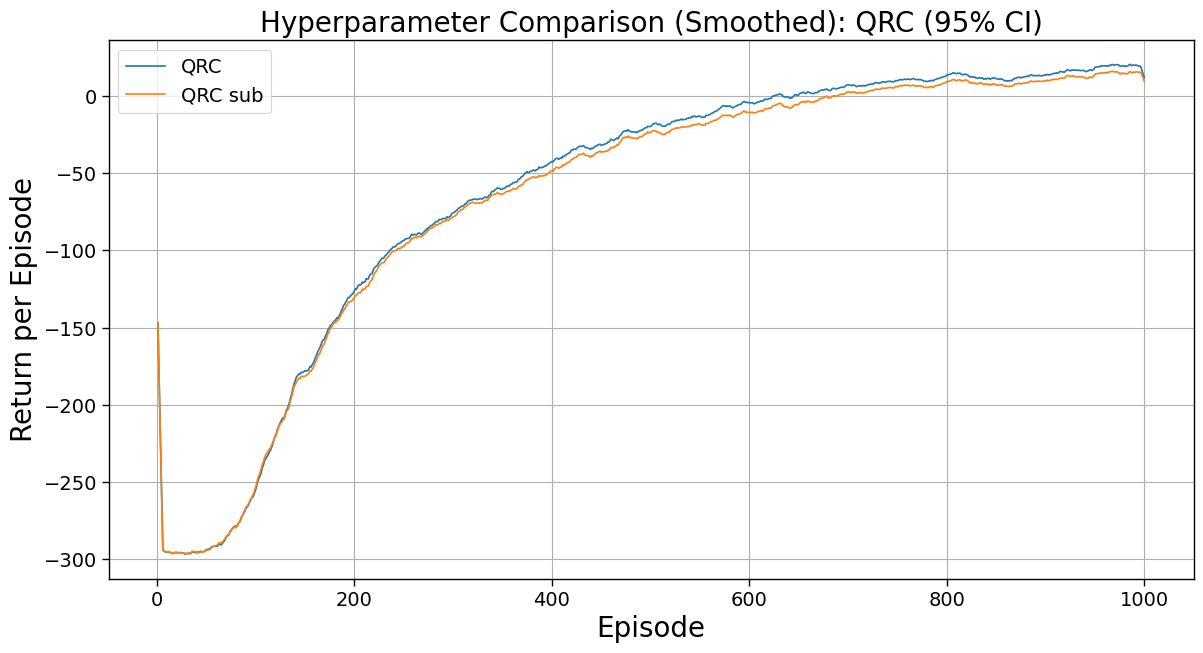

In [136]:
folders = [
    "../data/qrc_results/best_hyperparameters",
    "../data/qrc_results/with_dqn_hyperparameters"
]
names = [
    "QRC",
    "QRC sub"
]
plot_multiple_rewards(
    folders, 
    names, 
    ci=0.95, 
    title="Hyperparameter Comparison: QRC"
)

plot_multiple_rewards_smooth(
    folders, 
    names, 
    ci=0.95, 
    title="Hyperparameter Comparison (Smoothed): QRC"
)

[Adam] Seeds: 241, Episodes: 1000
[AdamW] Seeds: 240, Episodes: 1000


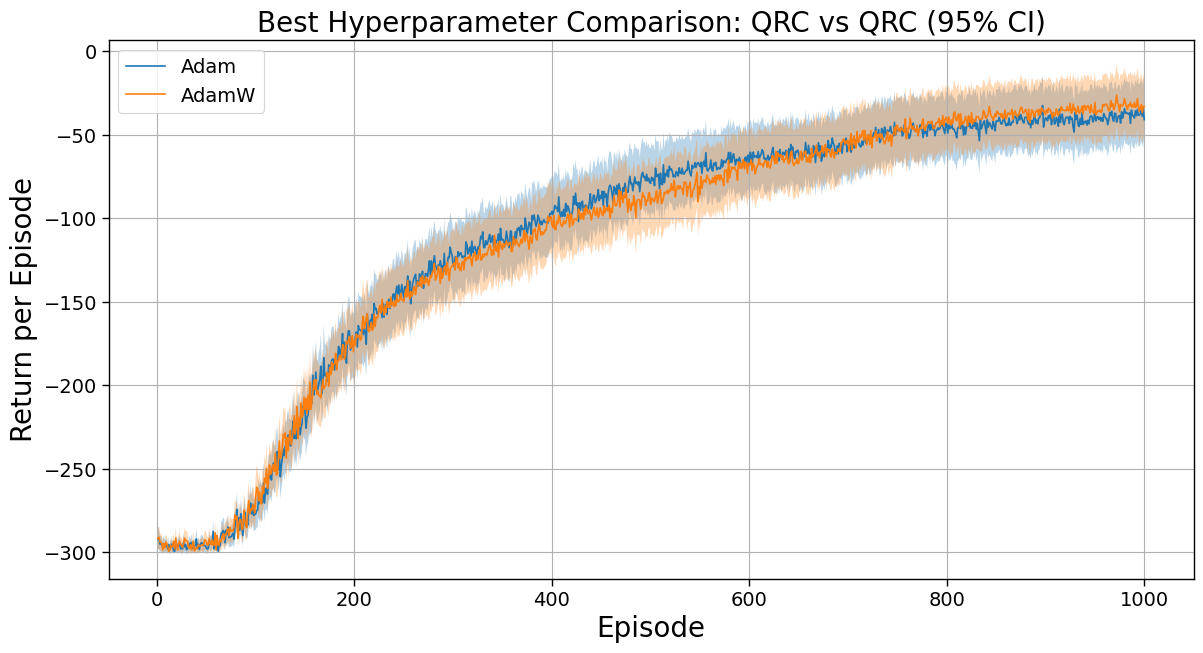

[Adam] Seeds: 241, Episodes: 1000
[AdamW] Seeds: 240, Episodes: 1000


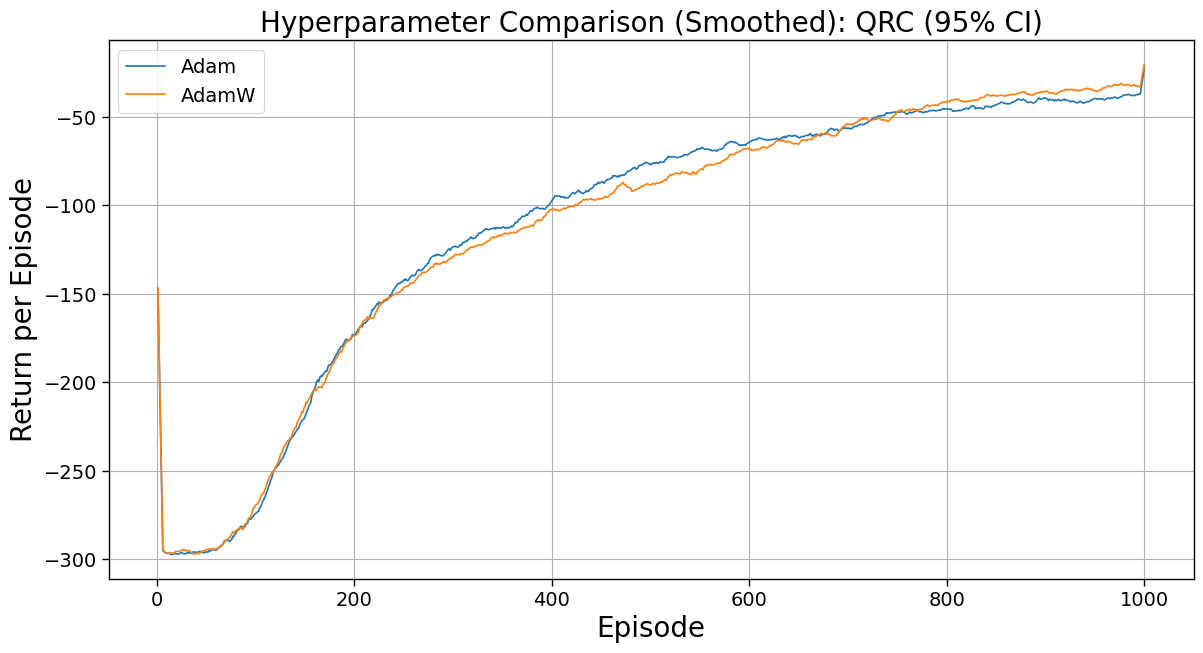

In [137]:
folders = [
    # "../data/qrc_results/best_hyperparameters",
    # "../data/dqn_results/best_hyperparameters",
    "../dummy/result_new_adam",
    "../dummy/result_new",
    # "../result_h_lr",
    # "../results_qrc_adamW",
    # "../results_dqn_adamW",
    # "../data/qrc_results/dummy"
]
names = [
    # "QRC",
    # "DQN",
    "Adam",
    "AdamW"
]
plot_multiple_rewards(
    folders, 
    names, 
    ci=0.95, 
    title="Best Hyperparameter Comparison: QRC vs QRC"
)

plot_multiple_rewards_smooth(
    folders, 
    names, 
    ci=0.95, 
    title="Hyperparameter Comparison (Smoothed): QRC"
)

In [138]:
import os
import numpy as np
import glob

EXPECTED_LENGTH = 1000  # your expected number of rewards

def load_array(file):
    """Load .npy or .txt file and return a numpy array."""
    ext = os.path.splitext(file)[1]

    if ext == ".npy":
        return np.load(file)

    elif ext == ".txt":
        try:
            # Load lines, convert to floats
            with open(file, "r") as f:
                lines = f.read().strip().splitlines()
            arr = np.array([float(x) for x in lines])
            return arr
        except Exception as e:
            print(f"  ❌ Error reading txt file {file}: {e}")
            return None

    else:
        return None


def check_folder(folder):
    print(f"\n=== Checking folder: {folder} ===")

    # Find .npy and .txt files
    patterns = ["*.npy", "*.txt"]
    files = []
    for p in patterns:
        files.extend(glob.glob(os.path.join(folder, "**", p), recursive=True))

    if not files:
        print("No .npy or .txt files found.")
        return

    for file in files:
        arr = load_array(file)
        if arr is None:
            continue

        shape = arr.shape
        # print(f"{os.path.basename(file):30s} shape = {shape}")

        # Wrong length warning
        if len(arr) != EXPECTED_LENGTH:
            print(f"{os.path.basename(file):30s} shape = {shape}")
            print(f"  ❌ ERROR: Expected {EXPECTED_LENGTH}, got {len(arr)}")


# ---- Run checks ----

folders = [
    "../result_new"
]

for folder in folders:
    check_folder(folder)


=== Checking folder: ../result_new ===
No .npy or .txt files found.


[QRC] Seeds: 251, Episodes: 1000
[DQN] Seeds: 251, Episodes: 1000


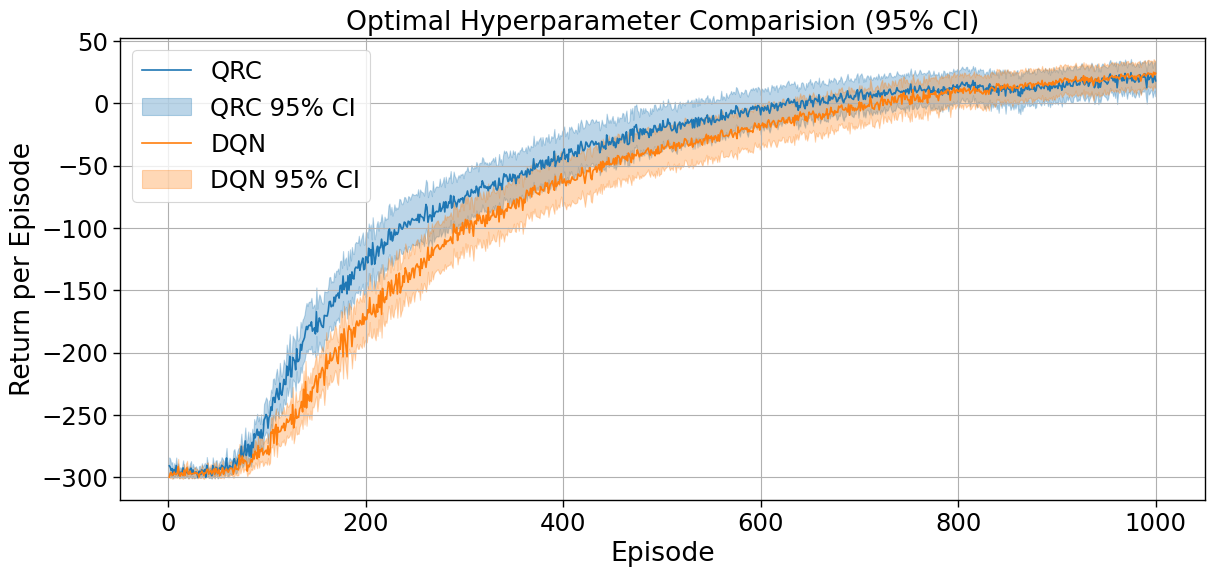

In [139]:
def plot_multiple_rewards(folders, names, ci=0.95, title="Training Rewards Comparison"):
    assert len(folders) == len(names), "folders and names must have same length"

    plt.figure(figsize=(14,6))
    sns.set_context("paper", font_scale=2)
    first = True
    dqn = ""
    qrc = ''
    qrc_rewards = None
    dqn_rewards = None
    for folder, name in zip(folders, names):
        
        all_rewards = load_all_rewards(folder)
        num_seeds, num_episodes = all_rewards.shape

        mean_rewards = np.mean(all_rewards, axis=0)
       
        std_rewards = np.std(all_rewards, axis=0)
        episodes = np.arange(1, num_episodes + 1)

        ci_multiplier = 1.645 if ci == 0.90 else 1.96
        ci_values = ci_multiplier * (std_rewards / np.sqrt(num_seeds))

    
        

        line, = plt.plot(episodes, mean_rewards, label=name)
        plt.fill_between(episodes, mean_rewards - ci_values, mean_rewards + ci_values,
                         color=line.get_color(), alpha=0.3, label=f"{name} {int(ci*100)}% CI")

        print(f"[{name}] Seeds: {num_seeds}, Episodes: {num_episodes}")
   
    plt.title(f"{title} ({int(ci*100)}% CI)")
    plt.xlabel("Episode")
    plt.ylabel("Return per Episode")
    plt.grid(True)
    plt.legend()
    plt.show()


folders = [
    "../data/qrc_results/best_hyperparameters",
    "../data/dqn_results/best_hyperparameters"
    
]
names = [
    "QRC",
    "DQN",

]

plot_multiple_rewards(
    folders,
    names,
    title="Optimal Hyperparameter Comparision"
)

QRC seeds : 5
DQN seeds : 8


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_20446/848980590.py:53: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])
/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_20446/848980590.py:53: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])


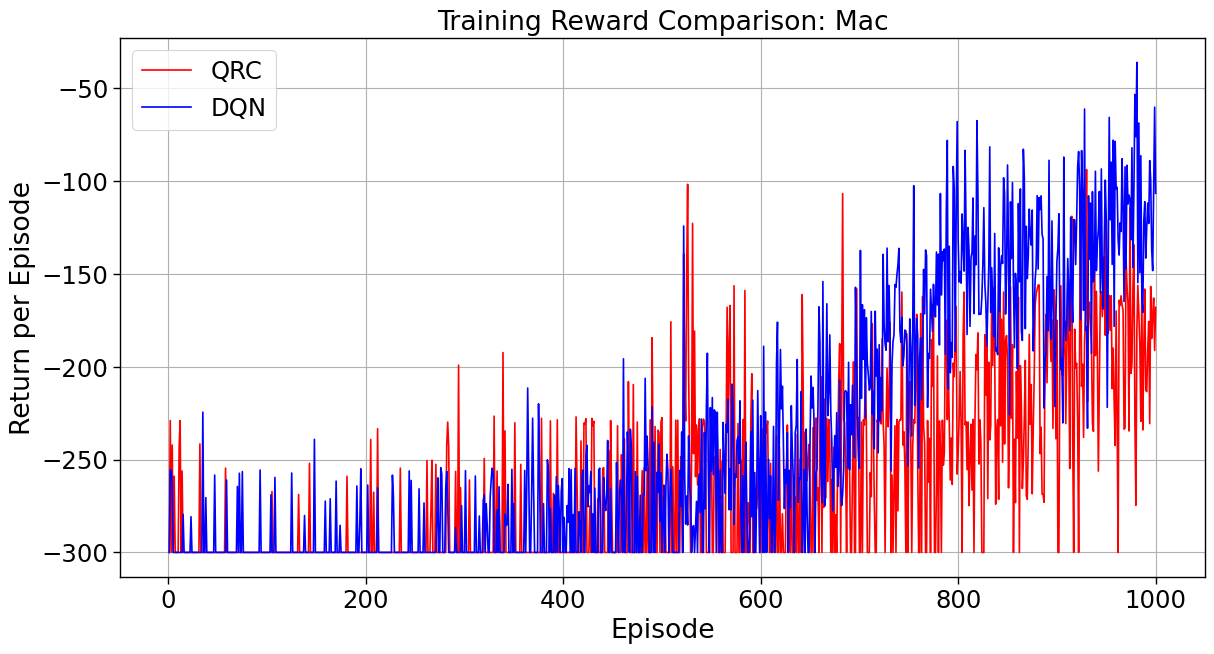

In [140]:
plot_graph(
    qrc_file="../data/qrc_reward_seeds_test.pt",
    dqn_file="../data/qrc_reward_seeds_test_2.pt",
    graph_title="Training Reward Comparison: Mac"
)